In [1]:
import sys
sys.path.insert(0,'../scripts')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
pd.set_option('max_column', None)
pd.set_option('display.float_format', '{:.2f}'.format)
%matplotlib inline

In [10]:
# Importing Local Modules
from load_data import loader
from data_info import DataInfo
from clean_Telecom import DataCleaner
from data_manipulation import DataManipulator
from Result_picker import picker

In [14]:
res = picker()

Experience is analyzed using  Handset type and average througput

In [32]:
clean_data = pd.read_csv("../data/cleaner_telecom.csv")
cleaner = DataCleaner(clean_data)
cleaner.drop_unwanted_columns(cleaner.df.columns[0])
clean_df = cleaner.df
clean_df.head()

,MSISDN/Number,no.of xDR sessions,Total Uploads,Total Downloads,Total_Uploads,Total_Downloads,Uploads,Downloads,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Avg Throughput (kbps),Handset Manufacturer,Handset Type,Last Location Name,IMSI,IMEI,Total UL and DL,Start,End,Avg Delay (ms),Activity_Duration(ms)
0,33601001722.00,1,36.75,480.62,36.75,480.62,36.75,480.62,18.36,2.91,3.70,1.57,17.86,292.43,180.56,67.00,Samsung,Samsung Galaxy A5 Sm-A520F,9164566995485190,208201448079117.00,35521209507511.00,345.63,2019-04-04 12:01:18,2019-04-25 14:35:31,47.00,76.41
1,33601001754.00,1,53.80,1180.29,53.80,1180.29,53.80,1180.29,39.36,4.41,0.94,1.93,35.57,609.92,541.96,42.00,Samsung,Samsung Galaxy J5 (Sm-J530),L77566A,208201909211140.00,35794009006359.00,707.19,2019-04-09 13:04:04,2019-04-25 08:15:48,70.00,3.73
2,33601002511.00,1,27.88,690.50,27.88,690.50,27.88,690.50,34.43,10.23,3.36,1.73,23.75,229.98,414.91,15.00,Samsung,Samsung Galaxy A8 (2018),D42335A,208200314458056.00,35281510359387.00,307.69,2019-04-09 17:42:11,2019-04-25 11:58:13,50.00,0.00
3,33601007832.00,1,43.32,1595.07,43.32,1595.07,43.32,1595.07,36.53,11.81,2.07,0.66,15.09,810.39,761.84,88.00,undefined,undefined,T21824A,208201402342131.00,35356610164913.00,889.35,2019-04-10 00:31:25,2019-04-25 07:36:35,50.00,41.21
4,33601008617.00,2,38.54,1119.85,38.54,1119.85,38.54,1119.85,34.22,7.75,2.11,0.91,17.54,531.24,564.62,15.00,Samsung,Samsung Sm-G390F,D88865A,208201401415120.00,35407009745539.00,607.68,2019-04-12 20:10:23,2019-04-25 10:40:32,50.00,0.00


In [36]:
#fixing outliers
working_df = cleaner.data_outlier(['Avg Delay (ms)','Avg Throughput (kbps)'])
working_df.loc[:,'Handset Type'].isnull().sum().sum()

0

In [39]:
#aggregating based on MSISDN/Number with the specified metrics and create working Dataframe
aggs_by_col = {
               'Avg Delay (ms)' :'sum',
               'Avg Throughput (kbps)': 'sum'
               }

working_df = working_df.groupby('MSISDN/Number').agg(aggs_by_col)
rn_df = clean_df.loc[:,['MSISDN/Number','Handset Type']]
rn_df = rn_df.groupby('MSISDN/Number')
working_df['Handset Type'] = rn_df.first().loc[working_df.index.to_list(),['Handset Type']]
working_df

,Avg Delay (ms),Avg Throughput (kbps),Handset Type
MSISDN/Number,,,
33601001722.00,47.00,67.00,Samsung Galaxy A5 Sm-A520F
33601001754.00,70.00,42.00,Samsung Galaxy J5 (Sm-J530)
33601002511.00,50.00,15.00,Samsung Galaxy A8 (2018)
33601007832.00,50.00,88.00,undefined
33601008617.00,50.00,15.00,Samsung Sm-G390F
...,...,...,...
33789996170.00,50.00,83.00,Apple iPhone 6 Plus (A1524)
33789997247.00,39.00,99.00,Apple iPhone 6S (A1688)
3197020876596.00,50.00,15.00,undefined


# Calculating the top bottom and most frequent

In [41]:
#using mode
explorer = DataInfo(working_df)
most_occuring_values = explorer.get_mode()
#Saving the data
res.add_data('most_occuring_values',most_occuring_values)
#result
most_occuring_values

Avg Delay (ms)                      50.00
Avg Throughput (kbps)              135.00
Handset Type             Huawei B528S-23A
Name: Mode, dtype: object

## avg delay Analysis

In [46]:
min_max_10_RTT = explorer.get_min_max_of_column('Avg Delay (ms)',10)
#Saving the data
res.add_data('min_max_10_RTT',min_max_10_RTT)
#result
min_max_10_RTT

,Max Value/s,Min Value/s
0,161.00,0.00
1,160.00,2.00
2,159.00,4.00
3,158.00,5.00
4,157.00,6.00
5,156.00,7.00
6,155.00,8.00
7,154.00,9.00
8,153.00,10.00
9,152.00,11.00


## Avg Throughput Analysis

In [48]:
min_max_10_Throughput = explorer.get_min_max_of_column('Avg Throughput (kbps)',10)
#Saving the data
res.add_data('min_max_10_Throughput',min_max_10_Throughput)
#result
min_max_10_Throughput

,Max Value/s,Min Value/s
0,51064.00,0.00
1,51063.00,1.00
2,51062.00,2.00
3,51058.00,3.00
4,51050.00,4.00
5,51044.00,5.00
6,51043.00,6.00
7,51042.00,7.00
8,51041.00,8.00
9,51038.00,9.00


# Distribution of Average Throughput  transmission based on Handset Type

In [50]:
#aggregating based on Handset Type with the Avg Throughput (kbps) metric
aggs_by_col = {'Avg Throughput (kbps)': 'sum'}

handset_thr_group_df = working_df.groupby('Handset Type').agg(aggs_by_col)


# top 10 handsets

In [52]:
top_10_handsets_Throughput = handset_thr_group_df.sort_values('Avg Throughput (kbps)', ascending=False).iloc[:10,:]
#Saving the data
res.add_data('top_10_handsets_Throughput',top_10_handsets_Throughput)
#result
top_10_handsets_Throughput

,Avg Throughput (kbps)
Handset Type,
Huawei B528S-23A,224513793.00
Apple iPhone 6 (A1586),32611396.00
undefined,31433557.00
Huawei E5180,28727445.00
Apple iPhone 6S (A1688),27312749.00
Apple iPhone 7 (A1778),22107267.00
Samsung Galaxy S8 (Sm-G950F),21890271.00
Apple iPhone Se (A1723),16318569.00
Samsung Galaxy S7 (Sm-G930X),15620909.00


In [54]:
least_10_handsets_Throughput = handset_thr_group_df.sort_values('Avg Throughput (kbps)', ascending=False).iloc[-10:,:]
#Saving the data
res.add_data('least_10_handsets_Throughput',least_10_handsets_Throughput)
#result
least_10_handsets_Throughput

,Avg Throughput (kbps)
Handset Type,
Rim 9780 Rcm72Uw Rcm73Uw (Fdd I Ii V Vi) (Generic),3.00
Rim Blackberry 9360,3.00
Rim Blackberry 9720,3.00
Concox Informati. Gt06,3.00
Rim Blackberry 9800,3.00
Samsung Gt-S6310N,2.00
Concox Informati. Concox Gt06 Gt06N Tr06,2.00
Quectel Wireless. Quectel Ec25-E,1.00
Lg Lg-T385,0.00


# least 10 handsets

In [56]:
least_10_handsets_Throughput = handset_thr_group_df.sort_values('Avg Throughput (kbps)', ascending=False).iloc[-10:,:]
#Saving the data
res.add_data('least_10_handsets_Throughput',least_10_handsets_Throughput)
#result
least_10_handsets_Throughput

,Avg Throughput (kbps)
Handset Type,
Rim 9780 Rcm72Uw Rcm73Uw (Fdd I Ii V Vi) (Generic),3.00
Rim Blackberry 9360,3.00
Rim Blackberry 9720,3.00
Concox Informati. Gt06,3.00
Rim Blackberry 9800,3.00
Samsung Gt-S6310N,2.00
Concox Informati. Concox Gt06 Gt06N Tr06,2.00
Quectel Wireless. Quectel Ec25-E,1.00
Lg Lg-T385,0.00


# k-means clustering of users based on the above metrics

In [57]:
#Standardize values before clustering
std_df = working_df.copy(deep=True)
dataManipulator = DataManipulator(std_df)
std_df = dataManipulator.standardize_column('Avg Throughput (kbps)')
std_df = dataManipulator.standardize_column('Avg Delay (ms)')
std_df = std_df.iloc[:,:-1]
std_df.sample(20)

,Avg Delay (ms),Avg Throughput (kbps)
MSISDN/Number,,
33627194880.00,-0.23,-0.53
33666844722.00,-0.71,-0.53
33622380310.00,-0.64,-0.54
33686777374.00,1.37,-0.50
33684907551.00,-0.23,-0.35
33626684379.00,0.85,-0.54
33763859508.00,-0.23,-0.54
33671473709.00,-0.60,-0.53
33650856754.00,-0.53,-0.53


In [59]:
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42}
# A list holds the SSE values for each k
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(std_df)
    sse.append(kmeans.inertia_)

In [65]:
km = KMeans(init="random",n_clusters=3,n_init=10)
label = km.fit_predict(std_df)
centroids = km.cluster_centers_
print(f'# Centroids of the clustering:\n{centroids}')
print(f'# The number of iterations required to converge: {km.inertia_}')
print(f'# The number of iterations required to converge: {km.n_iter_}')

#Getting index based on clusters
u_labels = np.unique(label)

# Centroids of the clustering:
[[ 0.09034885  1.97743698  2.98376248]
 [ 2.39898688  0.66358281  0.74156672]
 [-0.33059391 -0.44421102  1.11493279]]
# The number of iterations required to converge: 83421.34920080465
# The number of iterations required to converge: 14


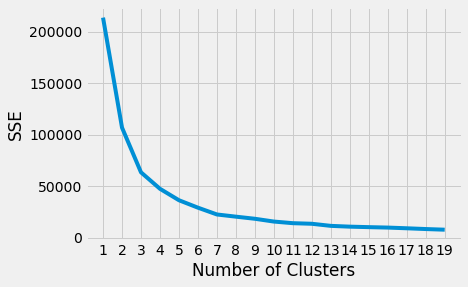

In [60]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [62]:
kl = KneeLocator(range(1, 20), sse, curve="convex", direction="decreasing")
kl.elbow

4

In [64]:
std_df['cluster'] = label
cleaner = DataCleaner(std_df)
cleaner.save_clean_data('../data/experience_cluster.csv')